In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU,Bidirectional
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# 导入数据
data = pd.read_csv('/content/tea_data.csv',encoding='utf-8')
#data=data.drop(['datetime'],axis=1)
data.head()
# 正規化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['土壤溫度'].values.reshape(-1,1))

In [ ]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]
# 创建适用于时间序列的数据结构
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 50
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(time_step, 1)))
bilstm_model.add(Bidirectional(LSTM(units=50)))
bilstm_model.add(Dense(units=1))
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')
bilstm_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=40, batch_size=64, verbose=1)

Epoch 1/40
37/37 [==============================] - 16s 167ms/step - loss: 0.0283 - val_loss: 0.0072
Epoch 2/40
37/37 [==============================] - 4s 113ms/step - loss: 0.0050 - val_loss: 0.0059
Epoch 3/40
37/37 [==============================] - 6s 167ms/step - loss: 0.0040 - val_loss: 0.0056
Epoch 4/40
37/37 [==============================] - 4s 110ms/step - loss: 0.0035 - val_loss: 0.0050
Epoch 5/40
37/37 [==============================] - 4s 113ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 6/40
37/37 [==============================] - 6s 168ms/step - loss: 0.0027 - val_loss: 0.0040
Epoch 7/40
37/37 [==============================] - 4s 114ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 8/40
37/37 [==============================] - 4s 117ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 9/40
37/37 [==============================] - 6s 167ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 10/40
37/37 [==============================] - 4s 113ms/step - loss: 0.0011 - val_loss: 0.002

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=40, batch_size=32, verbose=1)

Epoch 1/40
74/74 [==============================] - 9s 67ms/step - loss: 0.0170 - val_loss: 0.0072
Epoch 2/40
74/74 [==============================] - 3s 47ms/step - loss: 0.0049 - val_loss: 0.0067
Epoch 3/40
74/74 [==============================] - 4s 51ms/step - loss: 0.0046 - val_loss: 0.0062
Epoch 4/40
74/74 [==============================] - 5s 65ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 5/40
74/74 [==============================] - 4s 48ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 6/40
74/74 [==============================] - 4s 47ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 7/40
74/74 [==============================] - 5s 72ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 8/40
74/74 [==============================] - 4s 48ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/40
74/74 [==============================] - 3s 46ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 10/40
74/74 [==============================] - 4s 49ms/step - loss: 8.9926e-04 - val_loss: 0.0016
Epoch

In [ ]:
gru_model = Sequential()
gru_model.add(GRU(units=50,return_sequences=True, input_shape=(time_step, 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(units=1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=40, batch_size=32, verbose=1)

Epoch 1/40
74/74 [==============================] - 8s 60ms/step - loss: 0.0247 - val_loss: 0.0033
Epoch 2/40
74/74 [==============================] - 5s 68ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 3/40
74/74 [==============================] - 4s 48ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 4/40
74/74 [==============================] - 4s 48ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 5/40
74/74 [==============================] - 4s 54ms/step - loss: 8.9397e-04 - val_loss: 0.0012
Epoch 6/40
74/74 [==============================] - 5s 64ms/step - loss: 6.9049e-04 - val_loss: 8.4266e-04
Epoch 7/40
74/74 [==============================] - 4s 49ms/step - loss: 5.4722e-04 - val_loss: 6.7502e-04
Epoch 8/40
74/74 [==============================] - 4s 49ms/step - loss: 4.2999e-04 - val_loss: 5.4594e-04
Epoch 9/40
74/74 [==============================] - 5s 70ms/step - loss: 3.7822e-04 - val_loss: 5.2233e-04
Epoch 10/40
74/74 [==============================] - 4s 49ms/step - loss:

In [ ]:
lstm_test = lstm_model.predict(X_test)
bilstm_test = bilstm_model.predict(X_test)
gru_test = gru_model.predict(X_test)
lstm_train = lstm_model.predict(X_train)
bilstm_train = bilstm_model.predict(X_train)
gru_train = gru_model.predict(X_train)

74/74 [==============================] - 1s 15ms/step


In [ ]:
combined_train = np.column_stack((lstm_train,bilstm_train, gru_train))
combined_test = np.column_stack((lstm_test,bilstm_test, gru_test))

In [ ]:
combined_train
combined_test

array([[0.53047127, 0.534679  , 0.54659784],
       [0.51125973, 0.51987475, 0.54514545],
       [0.48738277, 0.4977665 , 0.50655365],
       ...,
       [0.593626  , 0.59649   , 0.60659957],
       [0.571645  , 0.5682746 , 0.5877108 ],
       [0.55451316, 0.5479089 , 0.5737889 ]], dtype=float32)

In [ ]:
blend_model = LinearRegression()
blend_model.fit(combined_train, Y_train)
blend_model.fit(combined_test, Y_test)

LinearRegression()

In [ ]:
train_predict=blend_model.predict(combined_train)
test_predict=blend_model.predict(combined_test)

train_predictions = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_train_inverse = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

In [ ]:
#test_loss = mean_squared_error (y_test_inverse, test_predictions)
#print(f'RMSE: {test_loss**0.5}')
trainScore = math.sqrt(mean_squared_error(y_train_inverse, train_predictions))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_inverse, test_predictions))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.13 RMSE
Test Score: 0.19 RMSE


In [ ]:
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(train_predict) + time_step, :1] = train_predictions

testPredictPlot= np.empty_like(scaled_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (time_step * 2) + 1:len(scaled_data)-1, :1] = test_predictions

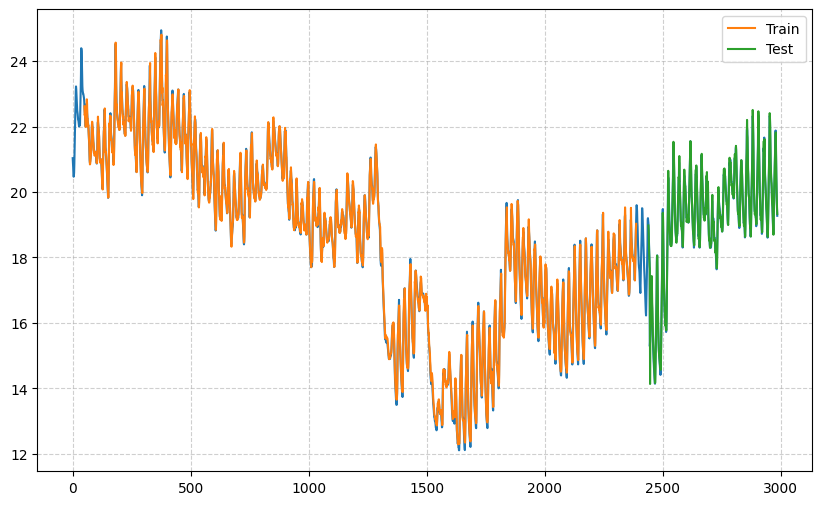

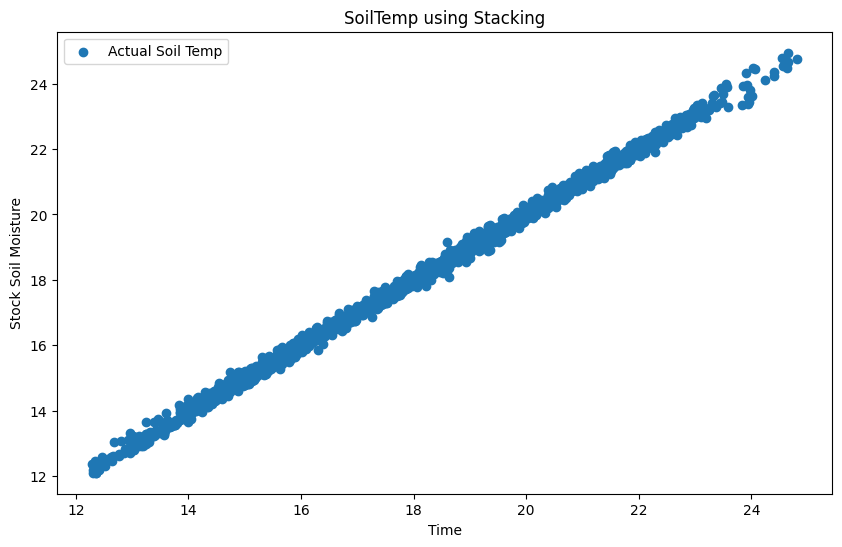

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot,label='Train')
plt.plot(testPredictPlot,label='Test')
#plt.ylabel('Temperature')
plt.grid(True,linestyle='--',alpha=0.6)
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.scatter(train_predictions.flatten(),y_train_inverse.flatten(), label='Actual Soil Temp')
plt.xlabel('Time')
plt.ylabel('Stock Soil Moisture')
plt.title('SoilTemp using Stacking')
plt.legend()
plt.show()

In [ ]:
days=30

In [ ]:
last_index = scaled_data.shape[0] - 1
future_indices=np.arange(last_index+1,last_index+days+1)
future_indices

In [ ]:
last_sequence = scaled_data[-time_step:].reshape(1,-1,1)
last_sequence.shape
future_predictions = []
scaled_data = np.nan_to_num(scaled_data, nan=0)
for _ in range(days):
  lstm=lstm_model.predict(last_sequence)
  bilstm=bilstm_model.predict(last_sequence)
  gru=gru_model.predict(last_sequence)
  c=np.column_stack((lstm,bilstm,gru))
  prediction = blend_model.predict(c)
  future_predictions.append(scaler.inverse_transform(prediction.reshape(-1, 1))[0,0])
  last_sequence = np.append(last_sequence[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)